 ## PCA Analysis Results
 The goal of this notebook is to document the PCA results on the simulated datasets.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from src.models.encoders.levelmulti import LevelMulti
from src.models.pipelines.pipelines import pca_pipeline

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (7, 5)


In [2]:
def load_data(filename):
    df = pd.read_csv(filename, index_col=0)
    ylevel = df['level'].values.copy()  
    #blexps = dfFile['blexp'].values.copy()       
    dfData = df.drop(['level', 'blexp'], axis=1).copy()
    return ylevel, dfData.values.copy()

def plot_data(title, y, X):
    ylabels = LevelMulti(targetmin=0.2, targetmax=0.8).transform(y)
    ylabel0 = np.nonzero(ylabels == 0)[0]
    ylabel1 = np.nonzero(ylabels == 1)[0]
    ylabel2 = np.nonzero(ylabels == 2)[0]  

    fig, axs = plt.subplots()
    l = axs.scatter(X[ylabel0, 0], X[ylabel0, 1], s=10, c='black', marker='o')
    n = axs.scatter(X[ylabel1, 0], X[ylabel1, 1], s=10, c='blue', marker='o')
    h = axs.scatter(X[ylabel2, 0], X[ylabel2, 1], s=10, c='red', marker='o') 
    axs.set_xlabel('PCA 1')
    axs.set_ylabel('PCA 2')
    axs.set_title(title)
    plt.legend((l, n, h), ('low', 'norm', 'high'), scatterpoints=1)  
    plt.show()      

def pca_plot(dsver, dsname):
    ydata, Xdata = load_data('./data/processed/ds{0:04d}-{1}-train.csv'.format(dsver, dsname))
    ppca = pca_pipeline(ncomponents=2)
    Xpca = ppca.fit_transform(Xdata)
    plot_data('PCA {0} Dataset'.format(dsname.capitalize()), ydata, Xpca)    


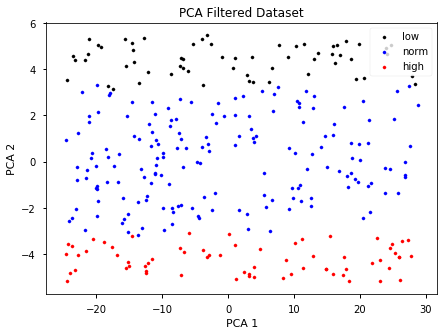

In [3]:
pca_plot(2, 'filtered')


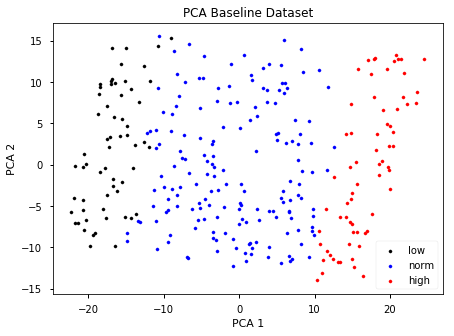

In [4]:
pca_plot(2, 'baseline')
